# Исследование взаимодействия с клиентами фитнес-центра "Культурист-датасаентист"

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данныхс целью уменьшения постоянного оттока клиентов.
Я работаю в данной сети аналитиком, и моя задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

## Импорт данных

Начну с импорта необходимых библиотек и данных:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Lasso, Ridge, 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import silhouette_score #, mean_absolute_error, mean_squared_error, r2_score,silhouette_score
from sklearn.metrics import accuracy_score #, precision_score, recall_score, f1_score,roc_auc_score
#import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import  linkage, dendrogram 

In [26]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведу все названия столбцов к нижнему регистру:

In [27]:
df.columns = df.columns.str.lower()

Данные и все библиотеки импортированы, все названия столбцов приведены к нижнему регистру

## Анализ данных

Посмотрю на датасет: есть ли в нем отсутствующие признаки, дубликаты, изучу средние значения и стандартные отклонения

In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатистический клиент нашего фитнес клуба это в равной доли парень или девушка, 29 лет, живущий или работающий в одном районе с клубом, посещая его в среднем от 1 до 2 раз, и на протяжении уже более 3 месяцев.

Пропущенных строк нет в датасете, все данные количественные. Отсуствующих значений не замечаю, минимальные данные в норме анализирую дальше

Посмотрю дубликаты в данных

In [29]:
df.duplicated().sum()

0

дубликатов в данных нет, посмотрю на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [30]:
display(df.groupby('churn').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Вижу разницу в средних в большинстве признаков, построю гистограммы что бы посмотреть на данные поближе

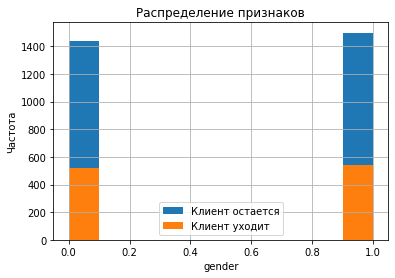

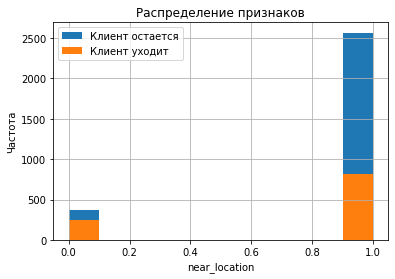

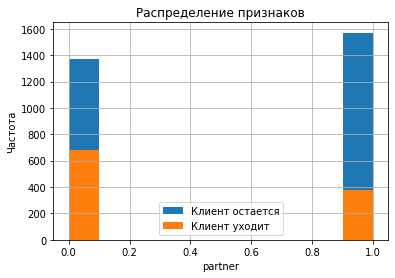

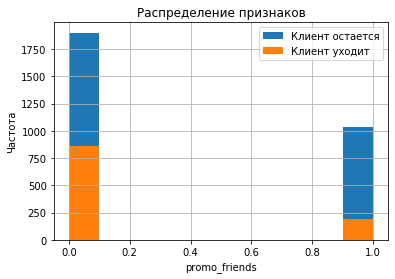

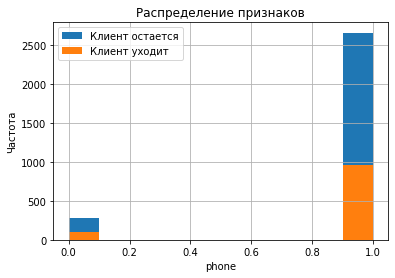

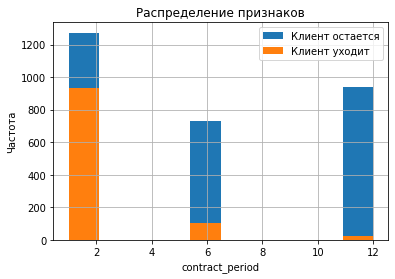

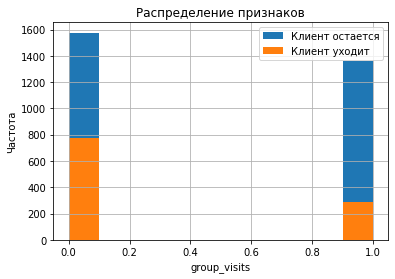

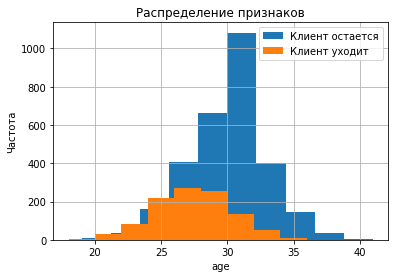

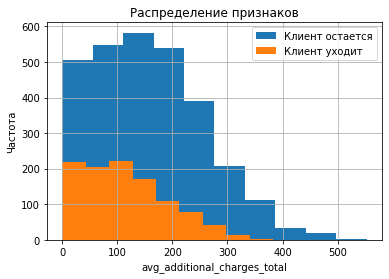

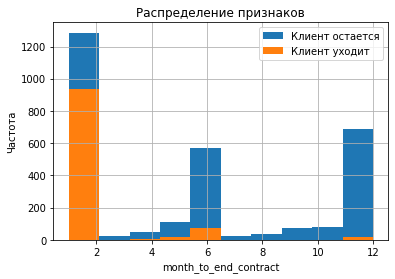

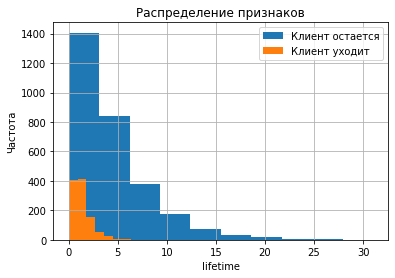

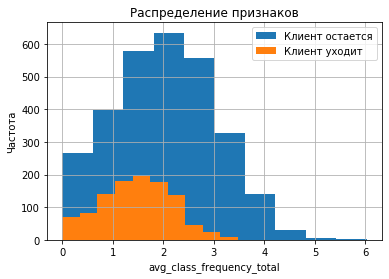

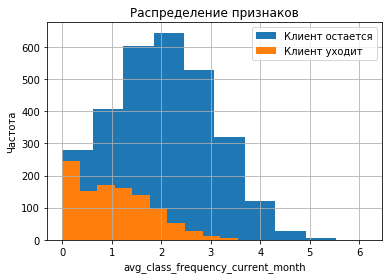

In [31]:
for i in df.drop('churn', axis=1).columns:
    
    df[df['churn'] == 0][i].hist(bins=10,label='Клиент остается')
    df[df['churn'] == 1][i].hist(bins=10, label='Клиент уходит')
  
    plt.title('Распределение признаков')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.legend()
    
    plt.show()

Гистограммы подтверждают сделанные выводы на сравнении средних признаков клиентов, на основании распределений можно сделать выводы что следующие признаки влияют останется клиент в клубе или нет: 

- близость к фитнес клубу
- друзья которые привели самого клиента в клуб
- длительность текущего абанемента
- посещает ли груповые занятие клиент
- возраст клиента
- сумма выручки от клиента на доп услуги
- как давно клиент посещает конкретный фитнес зал
- средняя частота посещений

Взгляну на матрицу корреляций

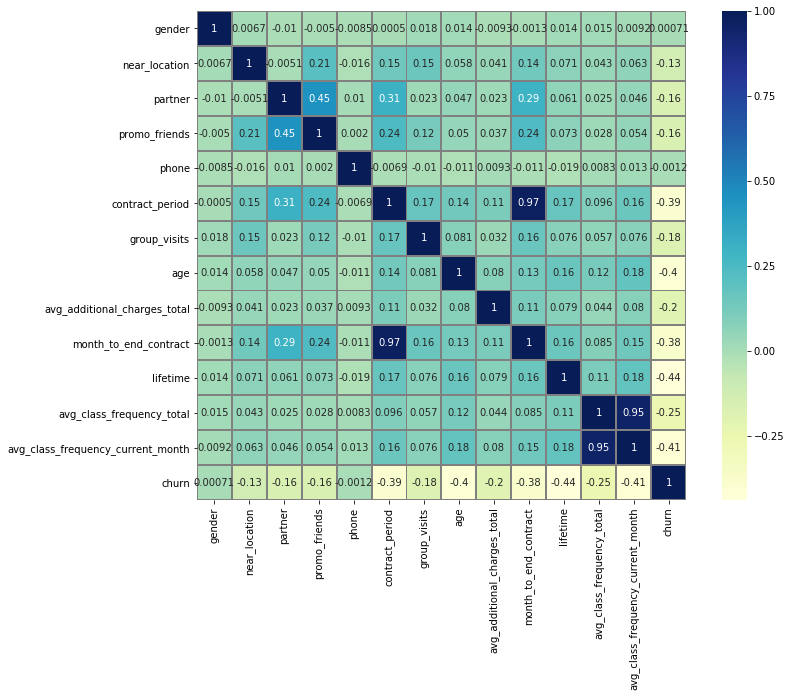

In [32]:
cm = df.corr()

plt.figure(figsize=(13, 9))
sns.heatmap(cm, annot = True, square=True, linewidths=1, linecolor='gray', cmap="YlGnBu",) 
plt.show()

Из сильно корелирующих признаков выделяю 2 пары, это:

    - средние кол-ва посещений в неделю за месяц и за весь срок
    - длительность абонемента и кол-во месяцов до истечения абонемента.
    
Кореляция в двух парах логична, а вот с самой переменной оттока заметны отрицательные корреляции со следующими признаками:

    - продолжительнось посещения клиентом конкретный фитнес зал
    - среднее кол-во посещений в неделю
    - количество месяцев в абонементе
    - возраст клиента
    
В этом случает отрицательная корреляция говорит нам о том что чем выше признак, тем больше переменных со значением 0, что значит клиент остался.

**Вывод**: Данные готовы для прогнозирования, дубликатов , пропусков нет.

Выделяю следующие признаки которые влияют на основную переменную:

- близость к фитнес клубу
- друзья которые привели самого клиента в клуб
- длительность текущего абанемента
- посещает ли груповые занятие клиент
- возраст клиента
- сумма выручки от клиента на доп услуги
- как давно клиент посещает конкретный фитнес зал
- средняя частота посещений

## Модель прогнозирования оттока клиентов

Разобью данные на обучающую и валидационную выборку функцией 

In [33]:
#разделю данные на признаки (матрица X) и целевую переменную (y)
x = df.drop(columns = ['churn'], axis=1)
y = df['churn']

# разделяю модель на обучающую и валидационную выборку с разбивкой 80% и 20%
X_train, X_test, y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

Обучу модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [34]:
# Начну с логической регресии
#задаю алгоритм для модели
model = LogisticRegression(solver='liblinear') 


# обучу модель
model.fit(X_train, y_train)

# воспользуюсь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1] 


# выведу все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, predictions)))
print('F1: {:.2f}' .format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))


Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85
ROC_AUC: 0.97


In [35]:
# задам алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# обучю модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуюсь уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]


# выведу все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}' .format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83
ROC_AUC: 0.88


Оценю метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 
Сравню по ним модели и решу какая модель показала себя лучше на основании метрик?

Лучшие показатели всех метрик у модели "Логическая регрессия", при этом обе модели показали хорошие результаты.

## Кластеризация клиентов

Стандартизирую данные.

In [36]:
sc = StandardScaler()
X_sc = sc.fit_transform(x)

Построю матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисую дендрограмму.

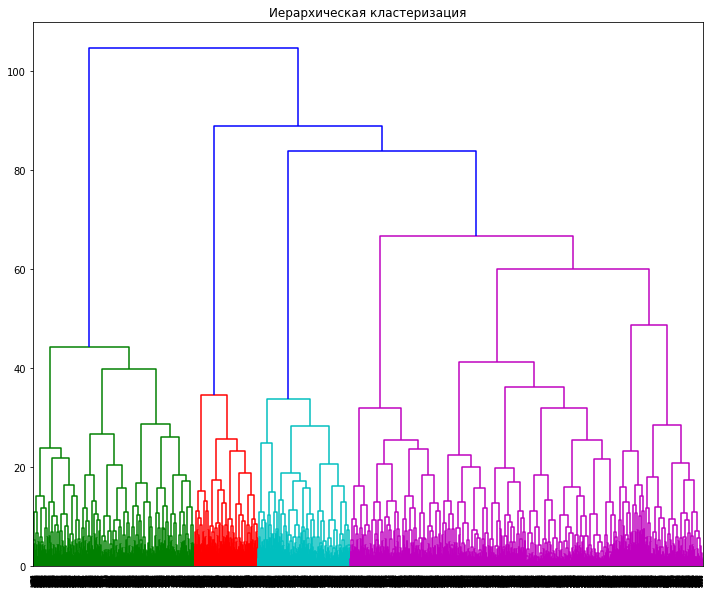

In [37]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(12, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

По полученной дендрограмме выделяю кол-во кластеров от 2 до 6.

Обучу модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов, количество кластеров возьму 5.

In [39]:
# задаю модель k_means с количеством кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# спрогнозирую кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраню метки кластера в поле нашего датасета
df['cluster'] = labels

# посчитаю метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels) ))

Silhouette_score: 0.14


Значение метрики силуета оказалось не очень высоким, но исходя из ксластеризации это и ожидаемо.

Посмотрю на средние значения признаков для кластеров. 

In [40]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


Замечаю ряд особеностей в каждом из кластеров:

**Кластер 0:**
- Большенство(96%) проживают или работают в районе, где находится фитнес-центр, 
- Большая доля(78%)клиентов это сотрудники компаний-партнёров клуба
- Большенство (57%) использовали промо-код от знакомого при оплате первого абонемента
- Средния признак длительности текущего действующего абонемента близок к 11 месяцам.
- И средний параметр по сроку до окончания абонемента высокий, почти 10 месяцев.
- В этом кластере средние затраты клиентов на сторонние услуги почти самые высокие по сравнению с другими кластерами.
- Соотвественно и отток в этом клестере минимальный всего 3 % из попавших в нее клиентов.

**Кластер 1:**
- Особенность этого кластера что клиенты не дают номер телефона, в остальном кластер с очень средними признаками.

**Кластер 2:**
- Все клиенты в этом кластере проживают или работают в другом районе, от фитнес-центра
- Самая минимальная доля клиентов (8%) по сравнению с другими кластерами кто использовал промо-код от знакомого при оплате первого абонемента.
- Самая минимальная доля клиентов (22 %) по сравнению с другими кластерами кто посещет груповые занятия

**Кластер 3:**
- В этом кластере клиенты реже других кластеров посещают фитнес зал, в среднем один раз в неделю.
- Самая большая доля (51 %) оттока по сравнению с другими кластерами.

**Кластер 4:**
- Клиенты же в этом кластере напротив, в среднем посещают фитнес зал почти в три раза чаще чем это делают клиенты из 3 кластера.
- Маленькое кол-во клиентов которые ушли (6 %)

Построю распределения признаков для кластеров.

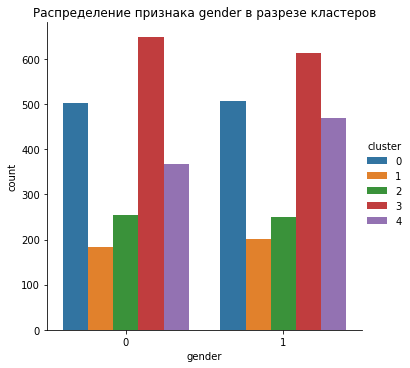

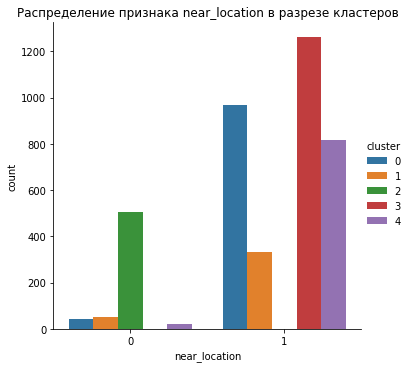

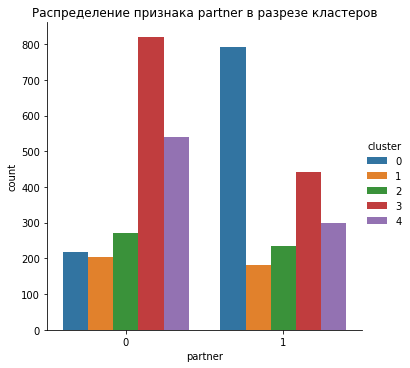

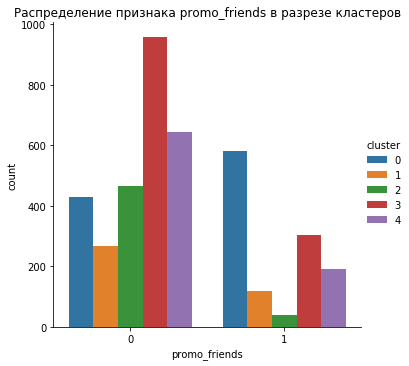

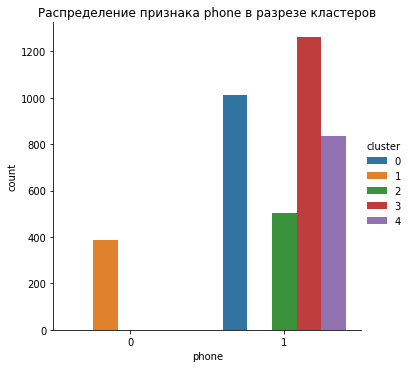

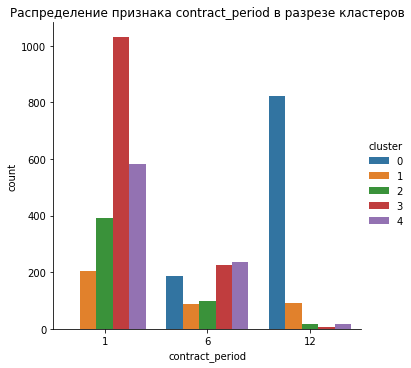

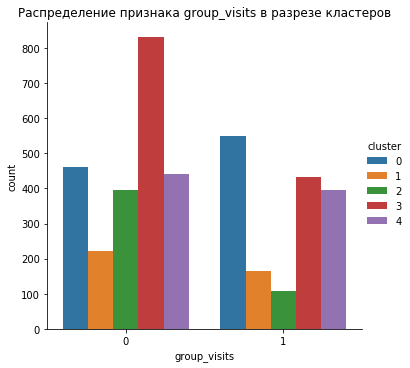

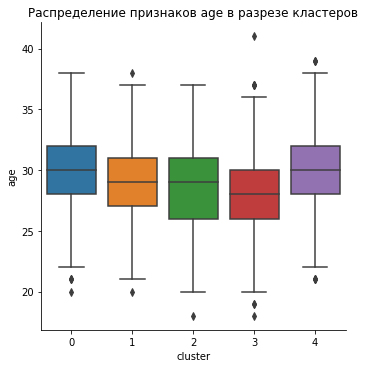

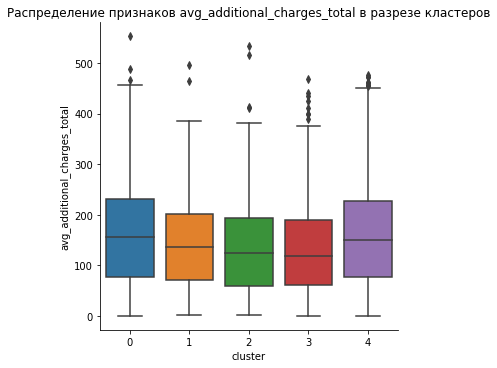

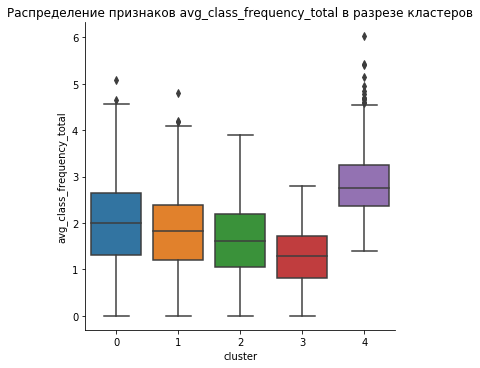

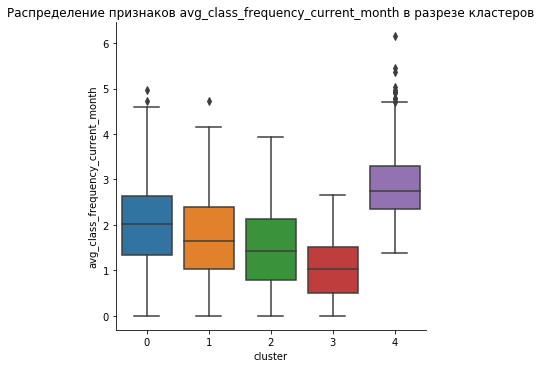

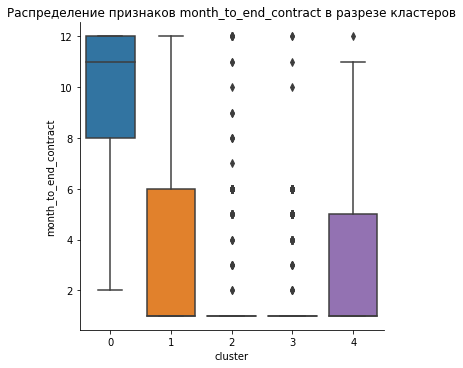

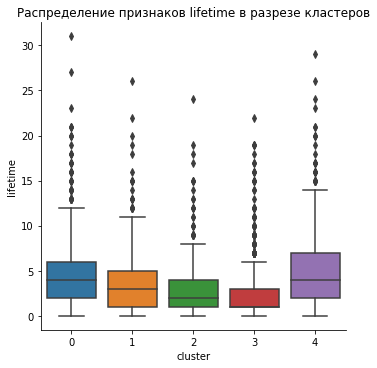

In [41]:
# разделю признаки на булевые и количественные
df_bool = ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits']
df_int = ['age','avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month','month_to_end_contract','lifetime']

#использую циклы выведу распределения
for i in df_bool:
    sns.catplot(x = i, hue = 'cluster', kind = 'count', data = df)
    plt.title('Распределение признака {} в разрезе кластеров'.format(i))
    
for i in df_int:
    sns.catplot(x="cluster", y=i, kind = 'box', data =  df)
    plt.title('Распределение признаков {} в разрезе кластеров'.format(i))

Взлянув на распределения я подтверждаю особенности которые делал раньше, в общем выводе еще раз его подтвержу.

Для каждого полученного кластера посчитаю долю оттока 

In [42]:
display(df[df['churn'] == 1].groupby('cluster')['churn'].count() / df[df['churn'] == 1]['churn'].count())

cluster
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

Доли оттока близки в кредним показателям по оттоку, и самаая большая доля в 3 кластере (61 %) а самые незначительные доли в кластере 0(3%) и 4(5%).

## Выводы и рекомендации

**1.** Предоставленный датасет был без выбросов пропусков и дубликатов, перед анализом названия столбцов были приведены к нижнему регистру

**2.** На этапе анализа групп клиентов которые остаются в клубе или уходят, были выявлены зависимости с признакоми которые клияют останеться клиентв клуббе или нет: 
 - близость к фитнес клубу
 - друзья которые привели самого клиента в клуб
 - длительность текущего абанемента
 - посещает ли груповые занятие клиент
 - возраст клиента
 - сумма выручки от клиента на доп услуги
 - как давно клиент посещает конкретный фитнес зал
 - средняя частота посещений

Матрица корреляции подтверждает зависимость основной переменной(оттока) со следующими признаками:

- продолжительнось посещения клиентом конкретный фитнес зал
- среднее кол-во посещений в неделю
- количество месяцев в абонементе
- возраст клиента

**3.** На этапе прогнозирования оттока, обучил модели "Логистическая регрессия" и "Случайный лес", обе модели показали высокие результаты а именно:
- Логистическаяческая регресия
  - Accuracy: 0.93
  - Precision: 0.86
  - Recall: 0.83
  - F1: 0.85
  - ROC_AUC: 0.97
  
- Случайный лес
   - Accuracy: 0.92
   - Precision: 0.84
   - Recall: 0.82
   - F1: 0.83
   - ROC_AUC: 0.88
  
Логистическая регрессия как видно из метрик показала себя немного лучше.

**4.** По результатов иерархической кластеризации, было принято решение разбить клиентов на 5 кластеров, после анализа 5 кластеров были выявленные следующие особенности: 

*Кластер 0:*
- Большенство(96%) проживают или работают в районе, где находится фитнес-центр, 
- Большая доля(78%)клиентов это сотрудники компаний-партнёров клуба
- Большенство (57%) использовали промо-код от знакомого при оплате первого абонемента
- Средния признак длительности текущего действующего абонемента близок к 11 месяцам.
- И средний параметр по сроку до окончания абонемента высокий, почти 10 месяцев.
- В этом кластере средние затраты клиентов на сторонние услуги почти самые высокие по сравнению с другими кластерами.
- Соотвественно и отток в этом клестере минимальный всего 3 % из попавших в нее клиентов.

*Кластер 1:*
- Особенность этого кластера что клиенты не дают номер телефона, в остальном кластер с очень средними признаками.

*Кластер 2:*
- Все клиенты в этом кластере проживают или работают в другом районе, от фитнес-центра
- Самая минимальная доля клиентов (8%) по сравнению с другими кластерами кто использовал промо-код от знакомого при оплате первого абонемента.
- Самая минимальная доля клиентов (22 %) по сравнению с другими кластерами кто посещет груповые занятия

*Кластер 3:*
- В этом кластере клиенты реже других кластеров посещают фитнес зал, в среднем один раз в неделю.
- Самая большая доля (51 %) оттока по сравнению с другими кластерами.

*Кластер 4:*
- Клиенты же в этом кластере напротив, в среднем посещают фитнес зал почти в три раза чаще чем это делают клиенты из 3 кластера.
- Маленькое кол-во клиентов которые ушли (6 %)

**5.** Рекомендации для сокращения оттока:

- Расширять партнерские программы с корпоративными клиентами.
- Разрабатывать мотивационную программу по привлечению клиентами своих друзей в зал
- Разработывать акции по продажам обанементов с большим количеством месяцев (от 9 до 12)
- Проведение обучения администраторов как правильно получить номер телефона клиента, для его информирования об изменениях в расписании и акциях в клубе
- Разработать программу для привлечения клиентами в групповые программы
- Разработать программу лояльности клиентов
